### Importing the data

In [1]:
import pandas as pd
import sqlite3
from sqlite3 import Error
import numpy as np
import matplotlib.pyplot as plt

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

conn = create_connection('main.db')

### By Airline (Delays, Cancellation, Diversion)

In [2]:
#Delay by Airline
sql_statement = '''SELECT
    f.IATA_Code_Marketing_Airline AS Airline,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE Airline = 'DL' OR Airline = 'AA' OR Airline = 'UA' OR Airline = 'WN'
    GROUP BY Airline
    ORDER BY TotalDelayAverage DESC
'''
delay_by_airline = pd.read_sql_query(sql_statement, conn)

In [3]:
print(delay_by_airline)

  Airline  DepartingDelayAverage  ArrivalDelayAverage  TotalDelayAverage
0      UA              14.550718            14.799600          29.350318
1      AA              13.882014            13.999795          27.881810
2      WN              14.921043            12.789838          27.710880
3      DL              10.683166            10.458301          21.141467


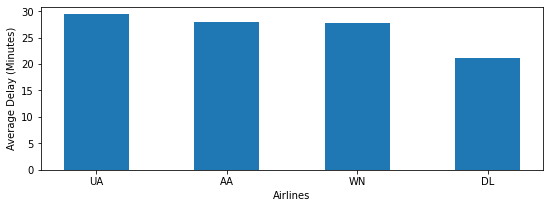

In [4]:
plt.figure(figsize=(9, 3))
plt.bar(delay_by_airline['Airline'], delay_by_airline['TotalDelayAverage'], width = 0.5)
plt.xlabel('Airlines')
plt.ylabel('Average Delay (Minutes)')
plt.show()

In [5]:
#Cancellation rate by Airline
sql_statement='''
SELECT f.IATA_Code_Marketing_Airline AS Airline,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
FROM flights f
WHERE Airline = 'DL' OR Airline = 'AA' OR Airline = 'UA' OR Airline = 'WN'
GROUP BY Airline
ORDER BY CancellationRatePercent DESC
'''
cancellation_by_airline = pd.read_sql_query(sql_statement, conn)

In [6]:
print(cancellation_by_airline)

  Airline  CancellationRatePercent
0      UA                 2.639959
1      AA                 2.583538
2      WN                 2.319371
3      DL                 1.306833


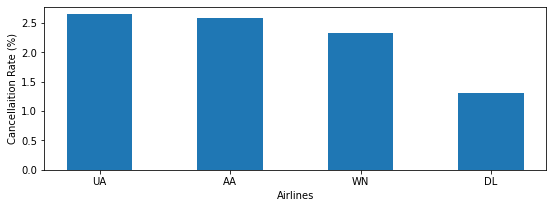

In [7]:
plt.figure(figsize=(9, 3))
plt.bar(cancellation_by_airline['Airline'], cancellation_by_airline['CancellationRatePercent'], width = 0.5)
plt.xlabel('Airlines')
plt.ylabel('Cancellaition Rate (%)')
plt.show()

In [8]:
#Diversion rate by Airline
sql_statement = '''
SELECT f.IATA_Code_Marketing_Airline AS Airline,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
FROM flights f
WHERE Airline = 'DL' OR Airline = 'AA' OR Airline = 'UA' OR Airline = 'WN'
GROUP BY Airline
ORDER BY DiversionRatePercent DESC
'''
diversion_by_airline = pd.read_sql_query(sql_statement, conn)

In [9]:
print(diversion_by_airline)

  Airline  DiversionRatePercent
0      UA              0.292676
1      AA              0.272379
2      WN              0.216524
3      DL              0.188943


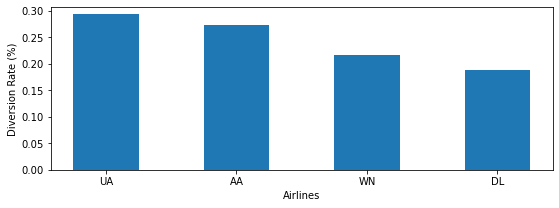

In [10]:
plt.figure(figsize=(9, 3))
plt.bar(diversion_by_airline['Airline'], diversion_by_airline['DiversionRatePercent'], width = 0.5)
plt.xlabel('Airlines')
plt.ylabel('Diversion Rate (%)')
plt.show()

### By Month (Delays, Cancellation, Diversion)

In [11]:
#Delay by month
sql_statement = '''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
)


SELECT * FROM tmp
ORDER BY TotalDelayAverage DESC
'''
delay_by_month = pd.read_sql_query(sql_statement, conn)

In [12]:
print(delay_by_month)

        Month  DepartingDelayAverage  ArrivalDelayAverage  TotalDelayAverage
0        July              17.871995            17.408437          35.280432
1        June              17.918529            17.336399          35.254928
2      August              16.970659            16.718722          33.689382
3    December              15.051839            14.165860          29.217699
4     October              13.336888            12.570833          25.907721
5         May              12.613527            12.220915          24.834443
6    February              11.538036            11.627643          23.165679
7       April              11.140944            10.854914          21.995857
8       March              11.092852            10.845619          21.938472
9     January              10.624916            10.456521          21.081436
10   November              10.360073             9.408147          19.768220
11  September              10.011051             9.584086          19.595137

In [13]:
#Delay by month
sql_statement = '''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 1
		WHEN strftime('%m', f.FlightDate) = '02' THEN 2
		WHEN strftime('%m', f.FlightDate) = '03' THEN 3
		WHEN strftime('%m', f.FlightDate) = '04' THEN 4
		WHEN strftime('%m', f.FlightDate) = '05' THEN 5
		WHEN strftime('%m', f.FlightDate) = '06' THEN 6
		WHEN strftime('%m', f.FlightDate) = '07' THEN 7
		WHEN strftime('%m', f.FlightDate) = '08' THEN 8
		WHEN strftime('%m', f.FlightDate) = '09' THEN 9
		WHEN strftime('%m', f.FlightDate) = '10' THEN 10
		WHEN strftime('%m', f.FlightDate) = '11' THEN 11
		WHEN strftime('%m', f.FlightDate) = '12' THEN 12
	END MonthNumber,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
)


SELECT Month, DepartingDelayAverage, ArrivalDelayAverage, TotalDelayAverage FROM tmp
ORDER BY MonthNumber
'''
delay_by_month = pd.read_sql_query(sql_statement, conn)

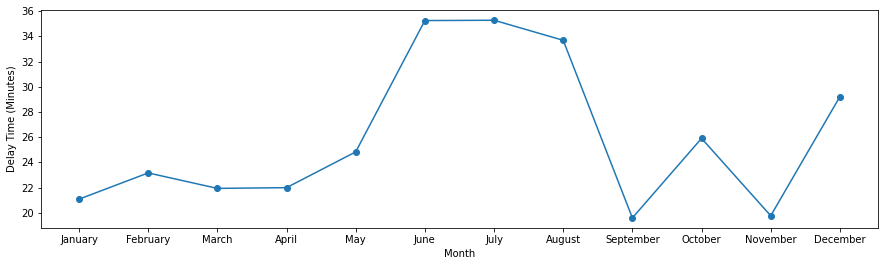

In [14]:
plt.figure(figsize=(15, 4))
plt.plot(delay_by_month['Month'], delay_by_month['TotalDelayAverage'], marker='o', linestyle='solid')
plt.xlabel('Month')
plt.ylabel('Delay Time (Minutes)')
plt.show()

In [15]:
#Cancellation rate by month
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
    ORDER BY CancellationRatePercent DESC
)


SELECT * FROM tmp
ORDER BY CancellationRatePercent DESC
'''
cancellation_by_month = pd.read_sql_query(sql_statement, conn)

In [16]:
print(cancellation_by_month)

        Month  CancellationRatePercent
0    February                 5.255416
1     January                 4.195801
2      August                 2.777532
3        June                 2.546937
4     October                 2.288984
5    December                 1.952426
6        July                 1.762907
7   September                 1.392084
8       March                 1.313447
9         May                 1.301966
10      April                 1.037783
11   November                 0.600816


In [17]:
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 1
		WHEN strftime('%m', f.FlightDate) = '02' THEN 2
		WHEN strftime('%m', f.FlightDate) = '03' THEN 3
		WHEN strftime('%m', f.FlightDate) = '04' THEN 4
		WHEN strftime('%m', f.FlightDate) = '05' THEN 5
		WHEN strftime('%m', f.FlightDate) = '06' THEN 6
		WHEN strftime('%m', f.FlightDate) = '07' THEN 7
		WHEN strftime('%m', f.FlightDate) = '08' THEN 8
		WHEN strftime('%m', f.FlightDate) = '09' THEN 9
		WHEN strftime('%m', f.FlightDate) = '10' THEN 10
		WHEN strftime('%m', f.FlightDate) = '11' THEN 11
		WHEN strftime('%m', f.FlightDate) = '12' THEN 12
	END MonthNumber,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
    ORDER BY CancellationRatePercent DESC
)


SELECT * FROM tmp
ORDER BY MonthNumber
'''
cancellation_by_month = pd.read_sql_query(sql_statement, conn)

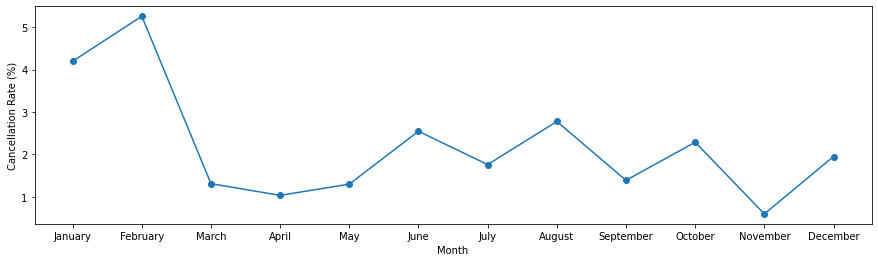

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(cancellation_by_month['Month'], cancellation_by_month['CancellationRatePercent'], marker='o', linestyle='solid')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.show()

In [19]:
#Diversion rate by month
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
    ORDER BY DiversionRatePercent DESC
)


SELECT * FROM tmp
ORDER BY DiversionRatePercent DESC
'''
diversion_by_month = pd.read_sql_query(sql_statement, conn)

In [20]:
print(diversion_by_month)

        Month  DiversionRatePercent
0      August              0.376848
1        July              0.358321
2        June              0.317866
3         May              0.267712
4    December              0.230551
5       March              0.219252
6       April              0.204417
7     October              0.185021
8     January              0.182382
9    February              0.177644
10  September              0.173038
11   November              0.125135


In [21]:
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 1
		WHEN strftime('%m', f.FlightDate) = '02' THEN 2
		WHEN strftime('%m', f.FlightDate) = '03' THEN 3
		WHEN strftime('%m', f.FlightDate) = '04' THEN 4
		WHEN strftime('%m', f.FlightDate) = '05' THEN 5
		WHEN strftime('%m', f.FlightDate) = '06' THEN 6
		WHEN strftime('%m', f.FlightDate) = '07' THEN 7
		WHEN strftime('%m', f.FlightDate) = '08' THEN 8
		WHEN strftime('%m', f.FlightDate) = '09' THEN 9
		WHEN strftime('%m', f.FlightDate) = '10' THEN 10
		WHEN strftime('%m', f.FlightDate) = '11' THEN 11
		WHEN strftime('%m', f.FlightDate) = '12' THEN 12
	END MonthNumber,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
    ORDER BY DiversionRatePercent DESC
)


SELECT * FROM tmp
ORDER BY MonthNumber
'''
diversion_by_month = pd.read_sql_query(sql_statement, conn)

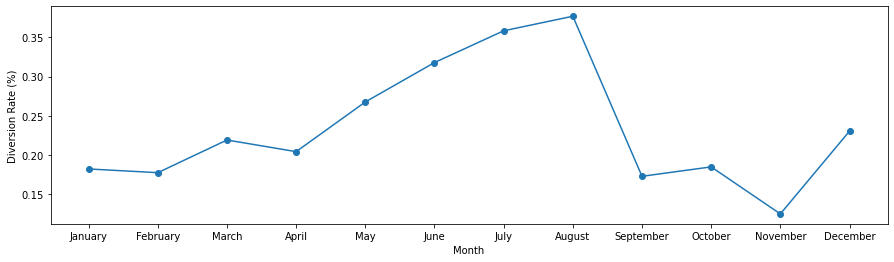

In [22]:
plt.figure(figsize=(15, 4))
plt.plot(diversion_by_month['Month'], diversion_by_month['DiversionRatePercent'], marker='o', linestyle='solid')
plt.xlabel('Month')
plt.ylabel('Diversion Rate (%)')
plt.show()

### By Quarter (Delay, Cancellation, Diversion)

In [23]:
#Delay by Quarter
sql_statement = '''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
)


SELECT * FROM tmp
ORDER BY TotalDelayAverage DESC
'''
delay_by_quarter = pd.read_sql_query(sql_statement, conn)

In [24]:
print(delay_by_quarter)

  Quarter  DepartingDelayAverage  ArrivalDelayAverage  TotalDelayAverage
0      Q3              15.774788            15.373641          31.148429
1      Q2              14.018641            13.592739          27.611379
2      Q4              12.920862            12.054118          24.974980
3      Q1              11.072499            10.953329          22.025828


In [25]:
sql_statement = '''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
)


SELECT Quarter, DepartingDelayAverage, ArrivalDelayAverage, TotalDelayAverage,
    CASE
		WHEN Quarter = 'Q1' THEN 1
		WHEN Quarter = 'Q2' THEN 2
		WHEN Quarter = 'Q3' THEN 3
		WHEN Quarter = 'Q4' THEN 4
	END QuarterNumber
FROM tmp
ORDER BY QuarterNumber
'''
delay_by_quarter = pd.read_sql_query(sql_statement, conn)

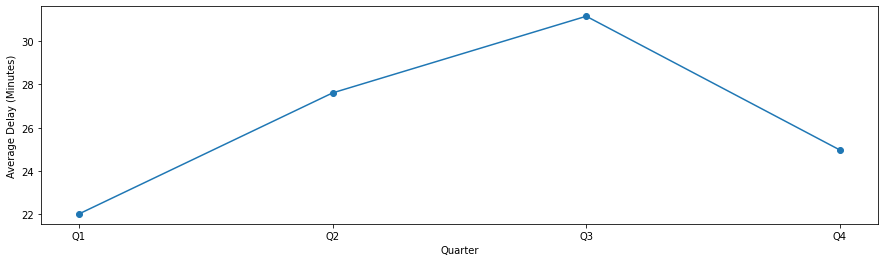

In [26]:
plt.figure(figsize=(15, 4))
plt.plot(delay_by_quarter['Quarter'], delay_by_quarter['TotalDelayAverage'], marker='o', linestyle='solid')
plt.xlabel('Quarter')
plt.ylabel('Average Delay (Minutes)')
plt.show()

In [27]:
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
    ORDER BY CancellationRatePercent DESC
)


SELECT * FROM tmp
ORDER BY CancellationRatePercent DESC
'''
cancellation_by_quarter = pd.read_sql_query(sql_statement, conn)

In [28]:
print(cancellation_by_quarter)

  Quarter  CancellationRatePercent
0      Q1                 3.461613
1      Q3                 1.932296
2      Q2                 1.657215
3      Q4                 1.622194


In [29]:
#Cancellation rate by Quarter
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
    ORDER BY CancellationRatePercent DESC
)


SELECT Quarter, CancellationRatePercent,
    CASE
		WHEN Quarter = 'Q1' THEN 1
		WHEN Quarter = 'Q2' THEN 2
		WHEN Quarter = 'Q3' THEN 3
		WHEN Quarter = 'Q4' THEN 4
	END QuarterNumber
FROM tmp
ORDER BY QuarterNumber
'''
cancellation_by_quarter = pd.read_sql_query(sql_statement, conn)

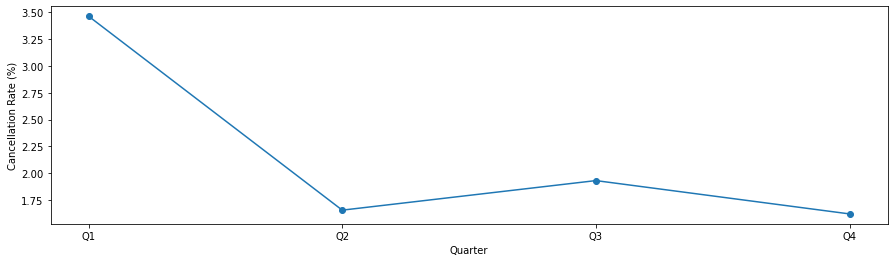

In [30]:
plt.figure(figsize=(15, 4))
plt.plot(cancellation_by_quarter['Quarter'], cancellation_by_quarter['CancellationRatePercent'], marker='o', linestyle='solid')
plt.xlabel('Quarter')
plt.ylabel('Cancellation Rate (%)')
plt.show()

In [31]:
#Diversion rate by Quarter
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
    ORDER BY DiversionRatePercent DESC
)


SELECT * FROM tmp
ORDER BY DiversionRatePercent DESC
'''
diversion_by_quarter = pd.read_sql_query(sql_statement, conn)

In [32]:
print(diversion_by_quarter)

  Quarter  DiversionRatePercent
0      Q3              0.318984
1      Q2              0.265530
2      Q1              0.194441
3      Q4              0.180282


In [33]:
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
    ORDER BY DiversionRatePercent DESC
)


SELECT Quarter, DiversionRatePercent,
    CASE
		WHEN Quarter = 'Q1' THEN 1
		WHEN Quarter = 'Q2' THEN 2
		WHEN Quarter = 'Q3' THEN 3
		WHEN Quarter = 'Q4' THEN 4
	END QuarterNumber
FROM tmp
ORDER BY QuarterNumber
'''
diversion_by_quarter = pd.read_sql_query(sql_statement, conn)

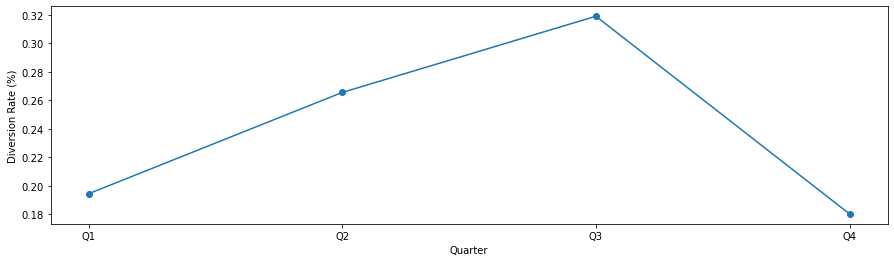

In [34]:
plt.figure(figsize=(15, 4))
plt.plot(diversion_by_quarter['Quarter'], diversion_by_quarter['DiversionRatePercent'], marker='o', linestyle='solid')
plt.xlabel('Quarter')
plt.ylabel('Diversion Rate (%)')
plt.show()

### By Source and Destination (Diversion)

In [35]:
sql_statement = '''
SELECT r.Source AS Source, r.Destination AS Destination,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
FROM Flights f
INNER JOIN routes r ON f.routeID = r.routeID
WHERE f.IATA_Code_Marketing_Airline = 'DL'
OR f.IATA_Code_Marketing_Airline = 'AA'
OR f.IATA_Code_Marketing_Airline = 'UA'
OR f.IATA_Code_Marketing_Airline = 'WN'
GROUP BY r.Destination
ORDER BY DiversionRatePercent DESC, r.Destination
'''
diversion_by_route = pd.read_sql_query(sql_statement, conn)

In [36]:
print(diversion_by_route)

    Source Destination  DiversionRatePercent
0      SFO         OTH              2.979516
1      ORD         ASE              2.914263
2      SLC         SUN              1.954513
3      SEA         JNU              1.840491
4      SEA         SIT              1.840491
..     ...         ...                   ...
329    HNL         GUM              0.000000
330    PHL         HVN              0.000000
331    PHL         IPT              0.000000
332    ATL         STX              0.000000
333    PHL         SWF              0.000000

[334 rows x 3 columns]


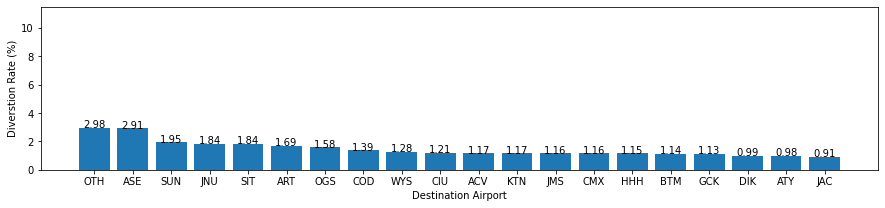

In [47]:
plt.figure(figsize=(15, 3))
destination = list(diversion_by_route['Destination'])[:20] #Taking top 20
diversions = list(diversion_by_route['DiversionRatePercent'][:20])
plt.bar(destination, diversions)
plt.ylim(0,11.5)
plt.xlabel('Destination Airport')
plt.ylabel('Diverstion Rate (%)')
for i in range(len(destination)):
    plt.text(i,diversions[i],round(diversions[i],2), ha = 'center')
plt.show()
#Limit to top 20

### By Distance (Diversion)

In [38]:
sql_statement = '''
SELECT f.Distance AS Distance,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
FROM Flights f
WHERE f.IATA_Code_Marketing_Airline = 'DL'
OR f.IATA_Code_Marketing_Airline = 'AA'
OR f.IATA_Code_Marketing_Airline = 'UA'
OR f.IATA_Code_Marketing_Airline = 'WN'
GROUP BY Distance
ORDER BY DiversionRatePercent DESC
'''
diversion_by_distance = pd.read_sql_query(sql_statement, conn)

In [39]:
print(diversion_by_distance)

      Distance  DiversionRatePercent
0         92.0            100.000000
1         82.0            100.000000
2         71.0            100.000000
3         68.0             61.538462
4       1304.0              5.607477
...        ...                   ...
1440      94.0              0.000000
1441      90.0              0.000000
1442      80.0              0.000000
1443      66.0              0.000000
1444      45.0              0.000000

[1445 rows x 2 columns]


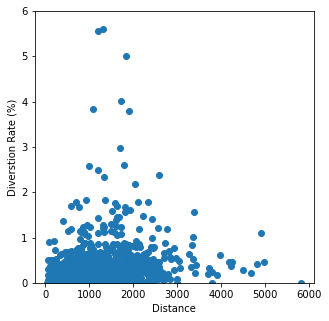

In [40]:
plt.figure(figsize=(5, 5))
plt.scatter(diversion_by_distance['Distance'], diversion_by_distance['DiversionRatePercent'])
plt.ylim(0,6)
plt.xlabel('Distance')
plt.ylabel('Diverstion Rate (%)')
plt.show()
#This plot does not include the four outliers with diversion rates of 100% for three of them
# and 61.5% for one of them